In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ai4neb

In [13]:
#- redshift, photo-z, m_u, m_g, m_r, m_i, m_z, petro50, petro90
sdss = np.load('DR9_photo-z-small.npy')

In [14]:
sdss.shape

(100000, 9)

In [15]:
sdss[0]

array([ 0.39964026,  0.344148  , 25.683548  , 20.814222  , 19.111876  ,
       18.458895  , 18.351385  ,  2.3227189 ,  5.778584  ], dtype=float32)

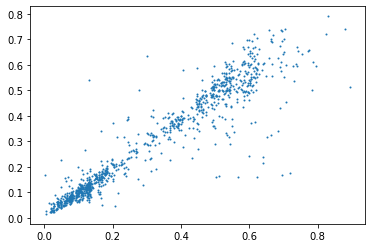

In [16]:
plt.scatter(sdss[0:1000,0], sdss[0:1000, 1], s=1);

In [17]:
sdss_df = pd.DataFrame(sdss, columns=('redshift', 'photo-z', 'm_u', 'm_g', 'm_r', 'm_i', 'm_z', 'petro50', 'petro90'))
sdss_df['log_petro50'] = np.log10(sdss_df['petro50'])
sdss_df['log_petro90'] = np.log10(sdss_df['petro90'])

In [18]:
sdss_df.describe()

,redshift,photo-z,m_u,m_g,m_r,m_i,m_z,petro50,petro90,log_petro50,log_petro90
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.404276,0.396646,22.651268,20.756454,19.317022,18.558365,18.177139,1.766773,4.568380,0.195284,0.605161
std,0.192559,0.185627,2.121528,1.764327,1.490485,1.267067,1.234719,2.104725,3.899702,0.179746,0.202164
min,0.000026,-0.000526,13.828072,12.263971,11.475709,10.966851,10.571234,0.070384,0.101272,-1.152525,-0.994512
25%,0.239152,0.241232,21.291794,19.535501,18.234929,17.699094,17.367150,1.192964,2.952616,0.076627,0.470207
50%,0.453396,0.441122,22.731034,21.316975,19.803043,18.959131,18.528835,1.506105,3.983968,0.177855,0.600316
75%,0.555304,0.540144,24.166098,22.075726,20.504852,19.545900,19.107799,1.959224,5.369060,0.292084,0.729898
max,1.002166,0.894627,29.379000,29.336216,27.810760,30.711807,28.203093,163.005219,237.316086,2.212202,2.375327


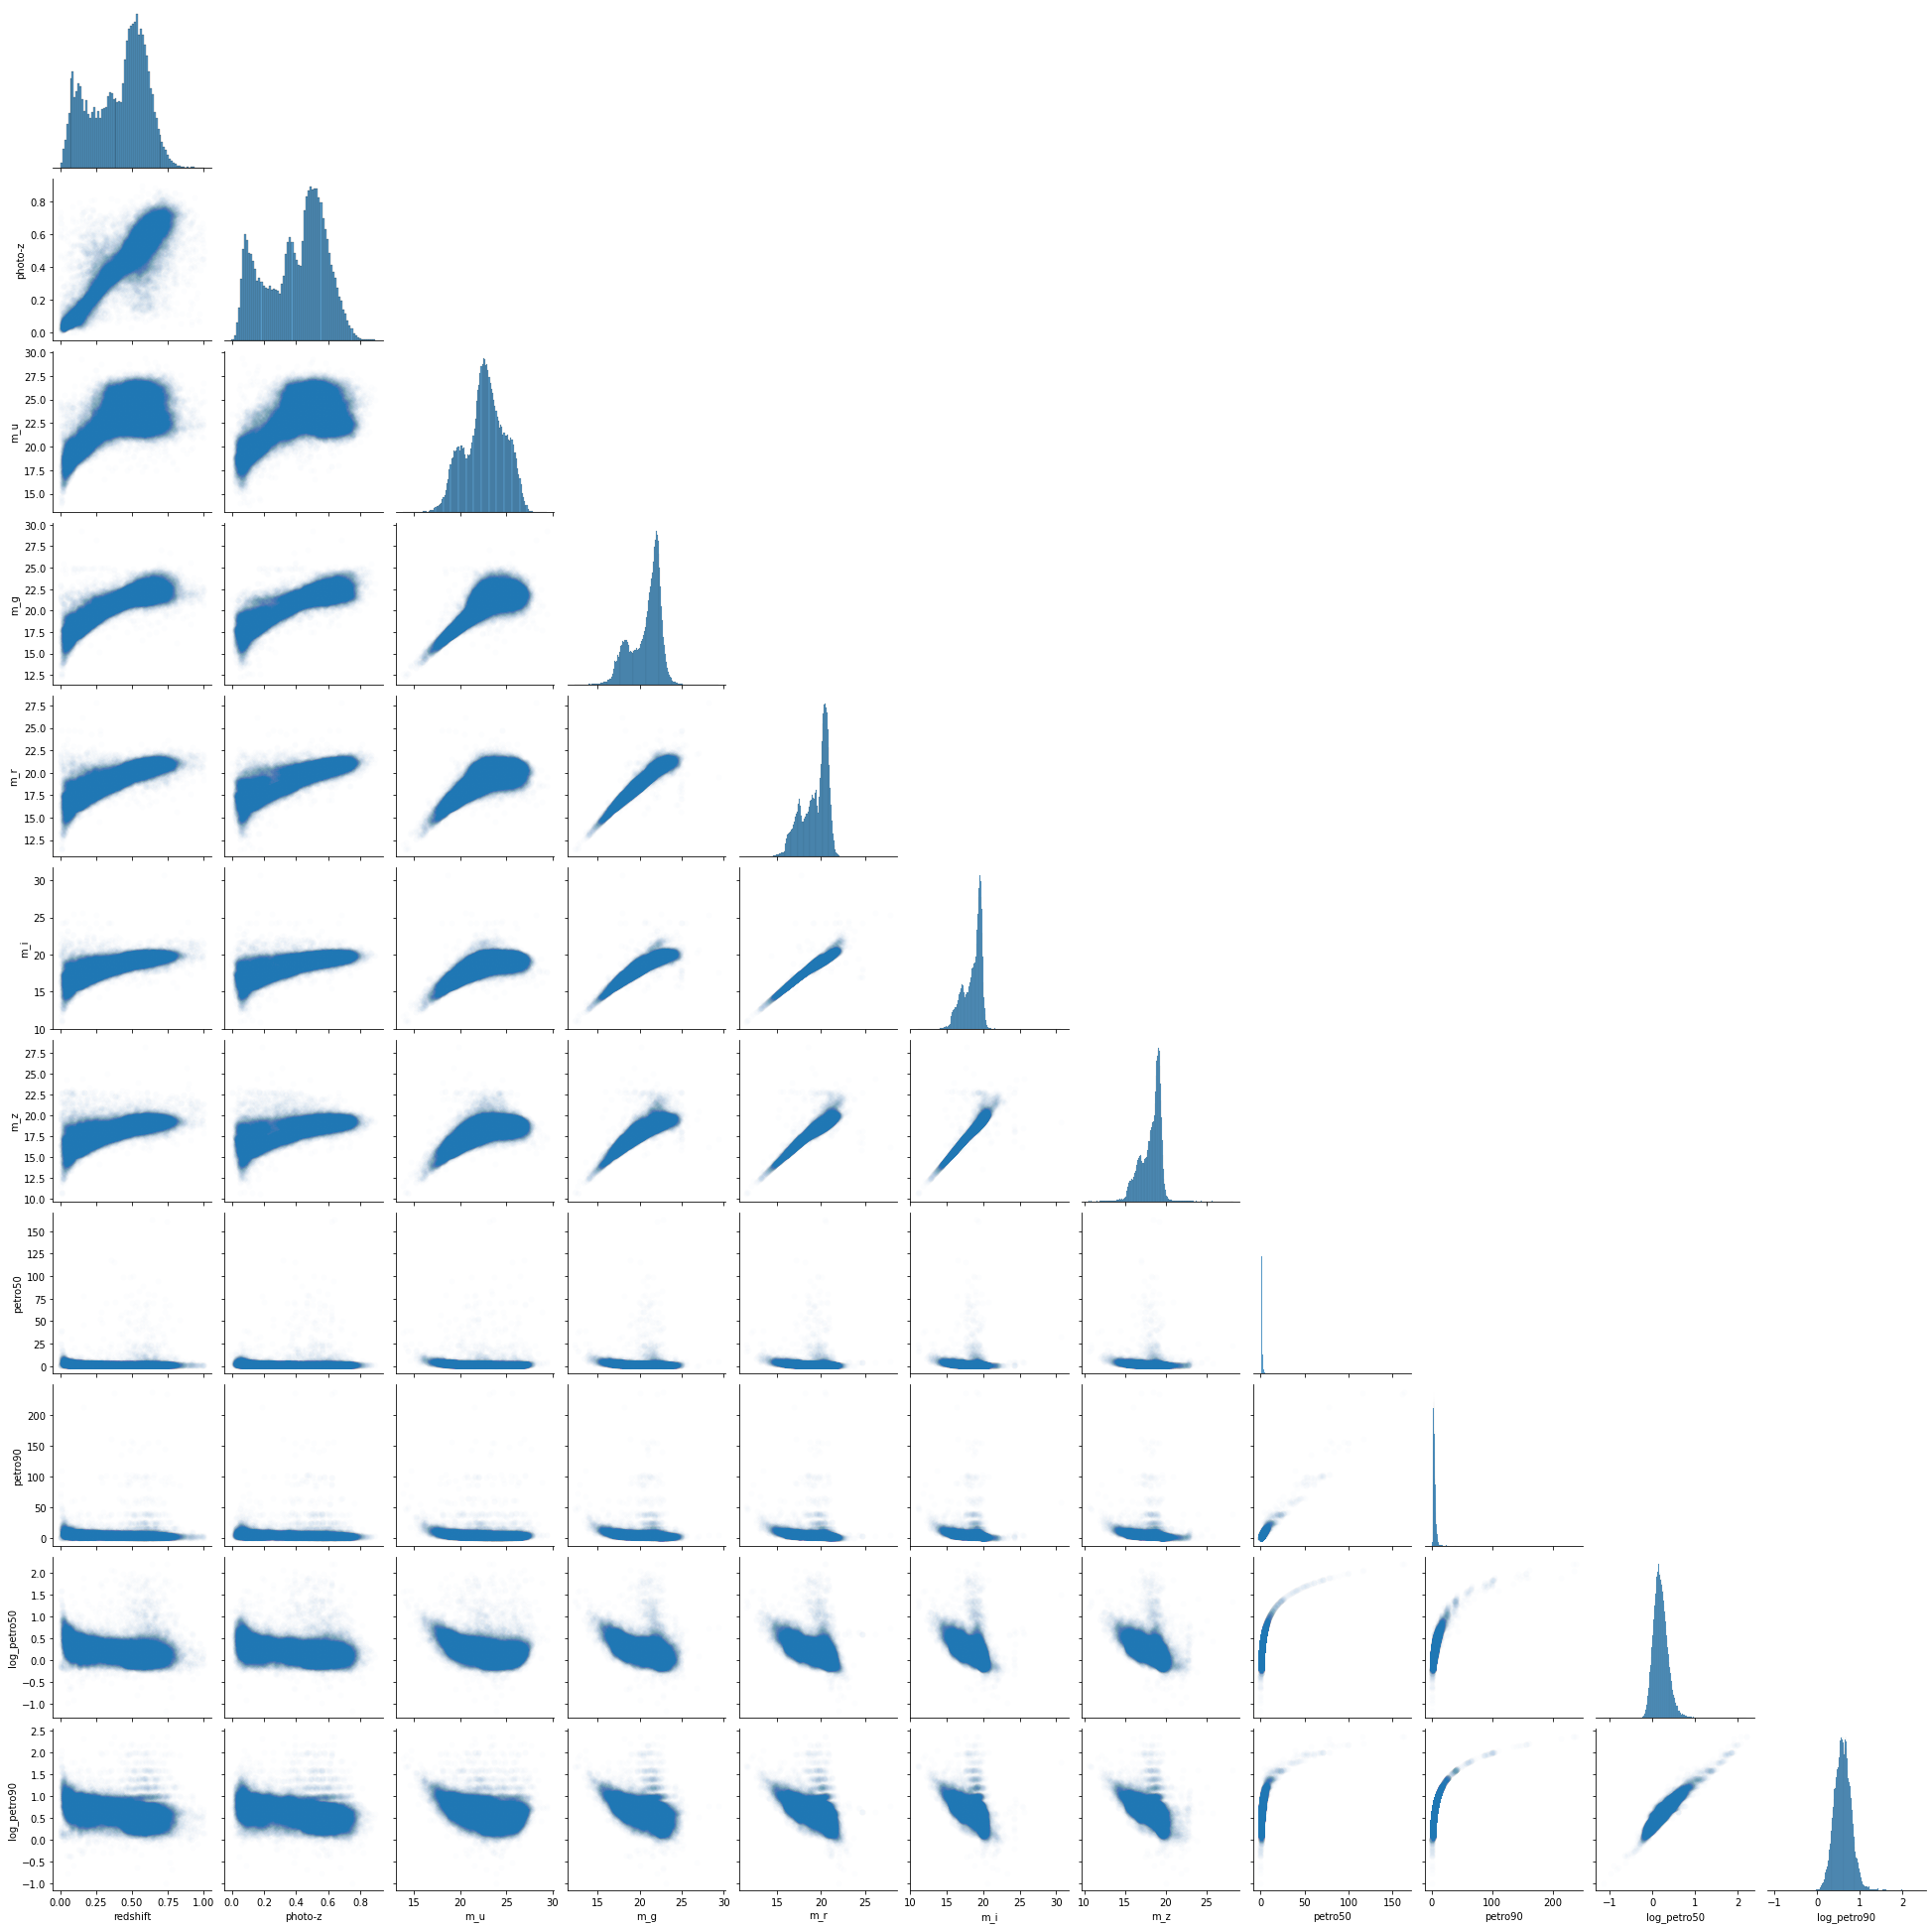

In [36]:
pp = sns.pairplot(sdss_df, plot_kws=dict(alpha=0.01), corner=True)

In [19]:
X_columns = ['m_u', 
             'm_g', 
             'm_r', 
             'm_i', 
             'm_z', 
#             'petro50', 
             'log_petro90']
             
y_columns = ['redshift']

train = sdss_df.sample(frac=0.9, random_state=32) #random state is a seed value
test = sdss_df.drop(train.index)

X_train = train[X_columns]
y_train = train[y_columns]

X_test = test[X_columns]
y_test = test[y_columns]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
n_X = X_train.shape[1]

(90000, 6) (90000, 1) (10000, 6) (10000, 1)


In [20]:
def make_RM(RM_type, **kwargs):
    RM = ai4neb.manage_RM(RM_type=RM_type, 
                          X_train=X_train.values, y_train=y_train['redshift'].values, 
                          X_test=X_test.values, y_test=y_test['redshift'].values, 
                          scaling=True, verbose=True, random_seed=10)
    RM.init_RM(**kwargs)
    RM.train_RM()
    RM.predict()
    return RM

In [21]:
RM_Poly = make_RM('Poly')

Instantiation. V 0.17
Training set size = 90000, Test set size = 10000
Train data scaled. 
Test data scaled. 
Training set size = 90000, Test set size = 10000
Training set size = 90000, Test set size = 10000
Regression Model Poly
Training 6 inputs for 1 outputs with 90000 data
RM trained. Score = 0.890
LinearRegression()
Training time 0.1 s.
Predicting from 6 inputs to 1 outputs using 10000 data in 0.00 secs.


In [22]:
RM_KANN = make_RM('K_ANN',hidden_layer_sizes=(8,4), 
                   epochs=20, 
                   activation='tanh',
                   solver='adam')

Instantiation. V 0.17
Training set size = 90000, Test set size = 10000
Train data scaled. 
Test data scaled. 
Training set size = 90000, Test set size = 10000
Training set size = 90000, Test set size = 10000
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 56        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Regression Model K_ANN
Training 6 inputs for 1 outputs with 90000 data
RM trained. Score = 0.916
Training time 61.5 s.
Predicting from 6 inputs to 1 outputs using 10000 data in 0.2

In [24]:
RM_SKANN = make_RM('SK_ANN',hidden_layer_sizes=(8,4), 
                   tol=1e-7, max_iter=20000, 
                   activation='tanh',
                   solver='adam')

Instantiation. V 0.17
Training set size = 90000, Test set size = 10000
Train data scaled. 
Test data scaled. 
Training set size = 90000, Test set size = 10000
Training set size = 90000, Test set size = 10000
Regression Model SK_ANN
Training 6 inputs for 1 outputs with 90000 data
RM trained, with 155 iterations. Score = 0.917
MLPRegressor(activation='tanh', hidden_layer_sizes=(8, 4), max_iter=20000,
             random_state=10, tol=1e-07)
Training time 24.5 s.
Predicting from 6 inputs to 1 outputs using 10000 data in 0.00 secs.


In [25]:
RM_SVM = make_RM('SK_SVM')

Instantiation. V 0.17
Training set size = 90000, Test set size = 10000
Train data scaled. 
Test data scaled. 
Training set size = 90000, Test set size = 10000
Training set size = 90000, Test set size = 10000
Regression Model SK_SVM
Training 6 inputs for 1 outputs with 90000 data
RM trained. Score = 0.911
SVR()
Training time 25.6 s.
Predicting from 6 inputs to 1 outputs using 10000 data in 0.75 secs.


In [26]:
RM_XGB = make_RM('XGB')

Instantiation. V 0.17
Training set size = 90000, Test set size = 10000
Train data scaled. 
Test data scaled. 
Training set size = 90000, Test set size = 10000
Training set size = 90000, Test set size = 10000
Regression Model XGB
Training 6 inputs for 1 outputs with 90000 data
RM trained. Score = 0.945
XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=10,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)
Training time 8.3 s.
Predicting from 6 inputs to 1 outputs using 10000 data in 0.03 secs.


,poly,kann,skann,svm,xgb
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.000997,-0.000052,-0.003586,-0.003604,0.000690
std,0.067510,0.057802,0.057491,0.060397,0.057710
min,-0.874098,-0.691007,-0.735374,-0.675200,-0.546065
25%,-0.027912,-0.022624,-0.026390,-0.031766,-0.022399
50%,-0.001065,-0.000955,-0.004518,-0.003117,-0.000063
75%,0.027374,0.023976,0.019884,0.024160,0.024574
max,1.448529,0.511043,0.452596,0.520005,0.580214


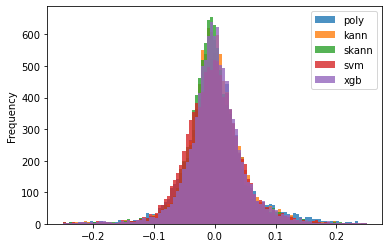

In [27]:
diff = y_test - RM_Poly.pred
diff.rename(columns={'redshift': 'poly'}, inplace=True)
diff['kann'] = y_test - RM_KANN.pred
diff['skann'] = ((y_test.T - RM_SKANN.pred).T)
diff['svm'] = (y_test - RM_SVM.pred)
diff['xgb'] = (y_test - RM_XGB.pred)

diff.plot.hist(bins=np.linspace(-.25,.25,100), alpha=0.8)
diff.describe()

# Now we will explore multivariate polynomial fit

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [29]:
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_ = poly.fit_transform(X_train)
clf = linear_model.LinearRegression()
clf.fit(X_train_, y_train)

LinearRegression()

In [30]:
X_test_ = poly.fit_transform(X_test)
y_pred_poly = clf.predict(X_test_)

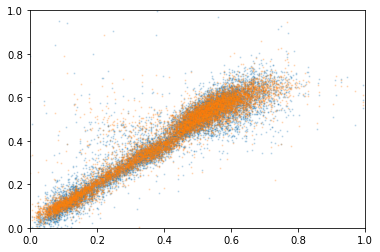

In [35]:
f, ax = plt.subplots()
ax.scatter(y_test, y_pred_poly, s=1, alpha=0.2)
ax.scatter(y_test, RM_KANN.pred, s=1, alpha=0.2)
ax.set_xlim(0,1)
ax.set_ylim(0,1);

In [33]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x4^2',
 'x4 x5',
 'x5^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0^2 x3',
 'x0^2 x4',
 'x0^2 x5',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x1 x3',
 'x0 x1 x4',
 'x0 x1 x5',
 'x0 x2^2',
 'x0 x2 x3',
 'x0 x2 x4',
 'x0 x2 x5',
 'x0 x3^2',
 'x0 x3 x4',
 'x0 x3 x5',
 'x0 x4^2',
 'x0 x4 x5',
 'x0 x5^2',
 'x1^3',
 'x1^2 x2',
 'x1^2 x3',
 'x1^2 x4',
 'x1^2 x5',
 'x1 x2^2',
 'x1 x2 x3',
 'x1 x2 x4',
 'x1 x2 x5',
 'x1 x3^2',
 'x1 x3 x4',
 'x1 x3 x5',
 'x1 x4^2',
 'x1 x4 x5',
 'x1 x5^2',
 'x2^3',
 'x2^2 x3',
 'x2^2 x4',
 'x2^2 x5',
 'x2 x3^2',
 'x2 x3 x4',
 'x2 x3 x5',
 'x2 x4^2',
 'x2 x4 x5',
 'x2 x5^2',
 'x3^3',
 'x3^2 x4',
 'x3^2 x5',
 'x3 x4^2',
 'x3 x4 x5',
 'x3 x5^2',
 'x4^3',
 'x4^2 x5',
 'x4 x5^2',
 'x5^3']

In [34]:
clf.coef_

array([[-4.06182647e-01, -6.91546619e-01, -5.21349430e-01,
        -3.68864924e-01, -3.92358422e-01,  3.01139772e-01,
        -1.71040460e-01,  4.75195274e-02,  1.70171916e-01,
        -2.56217182e-01,  1.13708429e-01, -9.38580185e-02,
         1.04489632e-01, -3.05541605e-01,  2.91009992e-01,
         1.26896158e-01,  1.25490069e-01,  3.94682616e-01,
         2.68709362e-01, -6.61352575e-01,  1.68940634e-01,
        -1.09069777e+00,  4.18625742e-01, -2.76853740e-01,
        -8.49401593e-01, -5.55605479e-02,  1.49391854e+00,
        -6.80121779e-01,  2.03713775e-04,  4.57078218e-04,
        -3.70731950e-03,  1.52455270e-03, -6.60296530e-04,
        -1.79834329e-02, -5.82957268e-03, -3.04077566e-02,
         2.78108865e-02,  9.37249511e-03, -4.30144109e-02,
         7.43624568e-03,  1.13746226e-02,  2.74976529e-02,
         8.10983703e-02, -6.26968592e-03, -4.21788208e-02,
        -1.53020620e-02,  4.97597456e-03,  1.48795955e-02,
         4.97179851e-02,  9.06497240e-03,  1.63260698e-0